In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.

In [2]:
df = pd.read_excel("iris1.xls")
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
df.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

*There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).

*There are some null-values present, we need to fill those out first.

*There are 50 observations of each Classification (setosa, versicolor, virginica).

In [8]:
#fill the null values
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [9]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
for i in['SL','SW','PL']:
    df[i] = df[i].fillna(df[i].median())

In [11]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

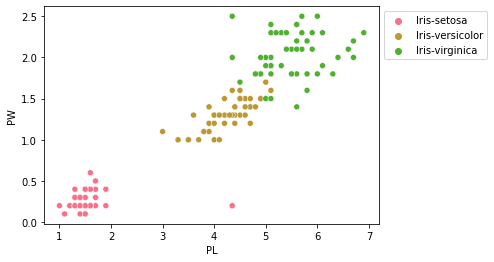

In [12]:
# Data Visualization
# Comparing Petal length & Petal Width
sns.scatterplot(x='PL', y='PW',
                hue='Classification', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

*Setosa has smaller petal lengths and widths.

*Versicolor lies in the middle of the other two Classification in terms of petal length and width

*Virginica has the largest of petal lengths and widths.

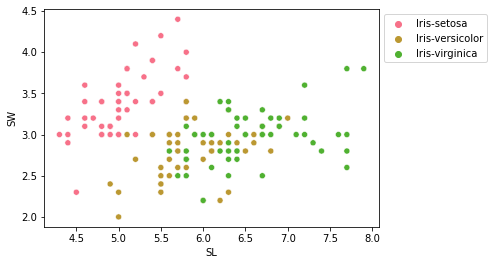

In [13]:
#Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SL', y='SW',
                hue='Classification', data=df, )
  
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

*Setosa has smaller sepal lengths but larger sepal widths.

*Versicolor lies in the middle of the other two classification in terms of sepal length and width

*Virginica has larger sepal lengths but smaller sepal widths.

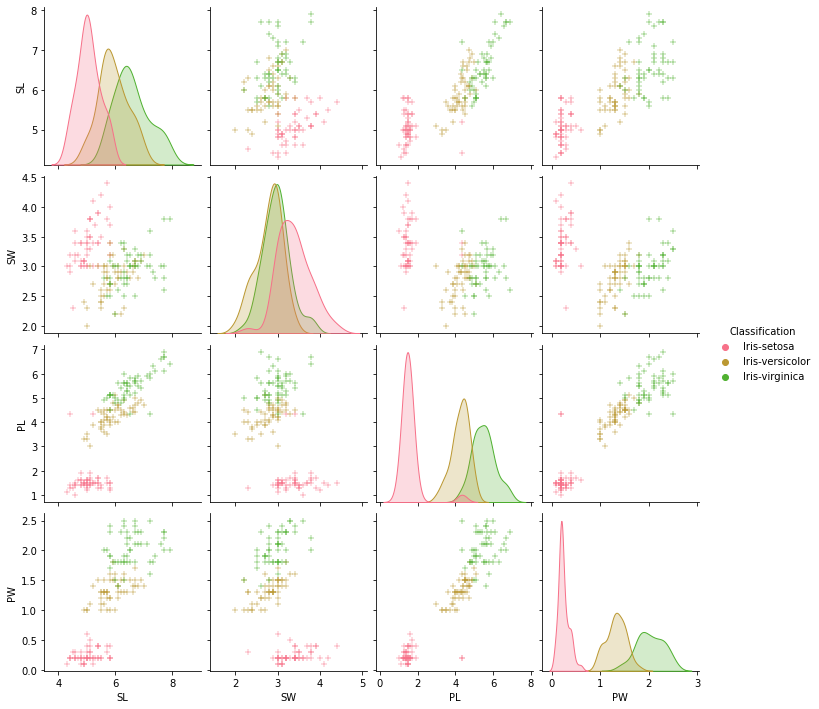

In [14]:
# Lets use pairplot of all columns
g = sns.pairplot(hue='Classification', markers='+',data=df)
plt.show()

*It is clear that the relationship between pairs of features of a iris-setosa
 (in pink) is distinctly different from those of the other two species.
    
*There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica(green).

# 2. Do necessary pre-processing steps.

<AxesSubplot:xlabel='SW'>

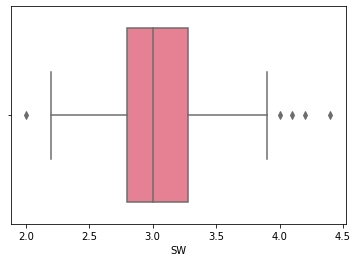

In [15]:
#Check whether there is outliers
sns.boxplot(x='SW', data=df)

Old Shape:  (150, 5)
New Shape:  (145, 5)


<AxesSubplot:xlabel='SW'>

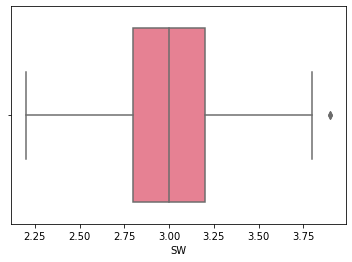

In [16]:
Q1 = np.percentile(df['SW'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['SW'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", df.shape)
  
upper = np.where(df['SW'] >= (Q3+1.5*IQR))
  
lower = np.where(df['SW'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='SW', data=df)

In [17]:
#Splitting Dataset into train & test
x = df[['SL','SW','PL','PW']]
y = df['Classification']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [19]:
x.head(2)

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [20]:
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: Classification, dtype: object

In [21]:
#Standard scaling
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)

In [22]:
x = pd.DataFrame(x)
x.describe()

,0,1,2,3
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02
mean,-7.739977e-16,1.117880e-16,-3.277072e-16,-5.206563e-17
std,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00
min,-1.925769e+00,-2.207277e+00,-1.668817e+00,-1.491392e+00
25%,-8.201252e-01,-5.989595e-01,-1.317189e+00,-1.226702e+00
50%,-8.302920e-02,-6.285378e-02,2.944376e-01,9.674884e-02
75%,6.540668e-01,4.732520e-01,7.339722e-01,7.584744e-01
max,2.496807e+00,2.349622e+00,1.788855e+00,1.684890e+00


In [23]:
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

Support Vector Machine(SVM)

In [24]:
from sklearn import svm
from sklearn import metrics

In [25]:
model = svm.SVC()
model.fit(x_train,y_train)

prediction=model.predict(x_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 0.8620689655172413


Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(x_train,y_train)

prediction=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9310344827586207


Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9310344827586207


K-Nearest Neighbours(KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    acc = accuracy_score(y_test,prediction)
    acc_values.append(acc)

In [31]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

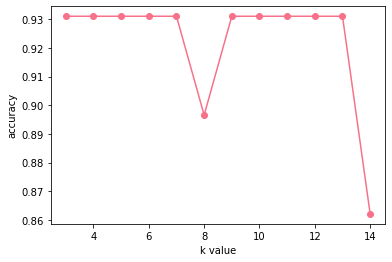

In [32]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [33]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.9310344827586207


Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

prediction=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9310344827586207


Here out of 5 classification models, SVM is the only one who's accuracy is less than the other four models.
Hence we can best predict the iris-species with those four models given.